In [1]:
# Widget Interface for QwenAgentPlayer
# This notebook provides interactive exploration of the trained model
#
# Setup: Run all cells in order. The widget will appear at the bottom.

import torch

# Import from the frameworks package
from frameworks import (
    device, create_model, tokenizer,
    arrow_task_batch, qa_task_batch, control_batch,
    blue_line_direction_batch,
)

# Import blue line data generator
from frameworks.blue_line_qa import get_blue_line_direction_data

# Import special tokens
from general_framework_lightweight import SPECIAL_TOKENS

# Import widget interface helper
from widget_interface import WidgetInterface, create_interface

# Override device if needed
# device = torch.device('cuda:1')  # uncomment to use different GPU
print(f"Using device: {device}")

/venv/main/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


pygame 2.6.1 (SDL 2.28.4, Python 3.12.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
Loading QwenAgentPlayer...
Creating QwenAgentPlayer with Qwen/Qwen3-0.6B...


`torch_dtype` is deprecated! Use `dtype` instead!


Loading weights:   0%|          | 0/311 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie model.embed_tokens.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning


Model ready!
Loading bf16 frankenstein checkpoint from /workspace/QwenPlayer_Naive/brain_checkpoints/qwen_agent_scales_control_only_batch2000_merged.pth...
Checkpoint loaded!
Loaded ProcessBench dataset with 400 examples
Using device: cuda:0


In [2]:
# Model is now imported from frameworks
# No need for separate imports

In [3]:
import matplotlib.pyplot as plt

def quick_display(torch_img):
    """Helper to display a torch image (handles bf16)."""
    clean = torch_img.detach().cpu().float()  # Convert bf16 to float for display
    if len(clean.shape) == 4:
        clean = clean[0]  # Remove batch dim
    right_order = torch.permute(clean, (1, 2, 0))
    array = right_order.numpy()
    plt.imshow(array)
    plt.show()

In [4]:
# Create QwenAgentPlayer model
model = create_model(device=device, use_lora=False)

# Load trained checkpoint
#CHECKPOINT = 'brain_checkpoints/qwen_agent_scales_control_only_batch2000_merged.pth'
#CHECKPOINT = 'brain_checkpoints/qwen_agent_control_arrow_qa_merged_batch62000.pth'
CHECKPOINT = 'brain_checkpoints/qwen_agent_control_arrow_qa_merged_batch62000.pth'

print(f"Loading checkpoint: {CHECKPOINT}")
model.pipe.model.load_state_dict(
    torch.load(CHECKPOINT, weights_only=True, map_location=device),
    strict=False  # Allow loading checkpoints without layer_scale_factors
)

model.reset()
print("Model ready!")

Creating QwenAgentPlayer with Qwen/Qwen3-0.6B...


Loading weights:   0%|          | 0/311 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie model.embed_tokens.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning


Model ready!
Loading checkpoint: brain_checkpoints/qwen_agent_control_arrow_qa_merged_batch62000.pth
Model ready!


In [5]:
# Some other elements to use

from game import *

game_settings = BIG_tool_use_advanced_2_5
game_settings.gameSize = 224 # for compatibility with brain's expected size
G = discreteGame(game_settings)

####

#For this time:
def reset_G():
    global G
    G = discreteGame(G.random_bare_settings(gameSize=224, max_agent_offset=0.5))

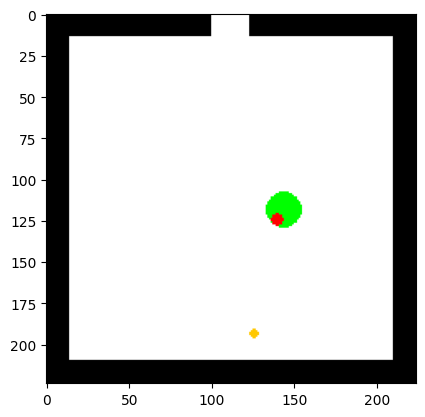

In [6]:
import matplotlib.pyplot as plt
reset_G()
plt.imshow(G.getData())

In [7]:
# THis notebook is to show the EnhancedBrain input, output, and state of mind at once.
# I'll start with a rough version and make it cleaner over time

In [8]:
from IPython.display import display
from ipywidgets import widgets

import numpy as np
import matplotlib.pyplot as plt

import time


In [9]:
#device = torch.device('cuda:0')

In [10]:
def pre_imshow_numpy(torch_img, imshow=False):
    """Convert torch image to numpy for display (handles bf16)."""
    clean = torch_img.detach()[0].cpu().float()  # Convert bf16 to float
    right_order = torch.permute(clean, (1, 2, 0))
    array = right_order.numpy()
    plt.imshow(array)
    return array

In [11]:
output = widgets.Output(layout={'border': '1px solid black'})

In [12]:
#model = EnhancedAgentBrain()
#model.move_to(device)
#2+2
# commment to prevent output

In [13]:
# Tokenizer is already imported from frameworks (Qwen tokenizer)
# No need to load old ByteLevelBPETokenizer
print(f"Using tokenizer: {type(tokenizer).__name__}")

Using tokenizer: Qwen2Tokenizer


In [14]:
T = widgets.Textarea(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=False
)

In [15]:
def get_image(game=None):
    if game is None:
        game = G
    # Use bf16 to match model expectations
    img = torch.tensor(G.getData(), dtype=torch.bfloat16).unsqueeze(0)
    img = torch.permute(img, (0, 3, 1, 2)).contiguous().to(device)
    return img

In [16]:
get_image()

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], device='cuda:0',
       dtype=torch.bfloat16)

In [17]:
# modify this for other inputs
# inp_tensor = get_image()
inp_tensor = None

In [18]:
# Tokenize with Qwen tokenizer (HuggingFace API)
text = "Hello World!"
encoded = tokenizer(text, return_tensors='pt')
tt = encoded['input_ids'].to(device)
print(f"Token IDs: {tt}")
print(f"Decoded: {tokenizer.decode(tt[0])}")

Token IDs: tensor([[9707, 4337,    0]], device='cuda:0')
Decoded: Hello World!


In [19]:
# Decode tokens back to text
tokenizer.decode(tt[0], skip_special_tokens=True)

'Hello World!'

In [20]:
# Check special token IDs
print(f"EOS token: '{tokenizer.eos_token}' (ID: {tokenizer.eos_token_id})")
print(f"\nGame action tokens (from SPECIAL_TOKENS):")
for token in SPECIAL_TOKENS:
    token_id = tokenizer.convert_tokens_to_ids(token)
    print(f"  '{token}' -> ID: {token_id}")

# Build the action mapping dynamically
ACTION_TOKEN_IDS = {
    tokenizer.convert_tokens_to_ids('<forward>'): 'forward',
    tokenizer.convert_tokens_to_ids('<clock>'): 'clockwise',
    tokenizer.convert_tokens_to_ids('<anticlock>'): 'anticlockwise',
}
print(f"\nACTION_TOKEN_IDS: {ACTION_TOKEN_IDS}")

EOS token: '<|im_end|>' (ID: 151645)

Game action tokens (from SPECIAL_TOKENS):
  '<forward>' -> ID: 151669
  '<clock>' -> ID: 151670
  '<anticlock>' -> ID: 151671

ACTION_TOKEN_IDS: {151669: 'forward', 151670: 'clockwise', 151671: 'anticlockwise'}


In [21]:
@output.capture()
def display_innards(b):
    """Display game state and model canvases."""
    print("Game status:\n")
    plt.imshow(G.getData())
    plt.show()
    
    print("Canvases:\n")
    # model.canvases is a list in QwenAgentPlayer
    if len(model.canvases) == 0:
        print("################\nNo canvases stored\n################")
    else:
        for i, canvas in enumerate(model.canvases):
            print(f"##########\nCanvas {i}:\n")
            # Handle 3D (C,H,W) or 4D (B,C,H,W) tensors, convert bf16 to float
            img = canvas.float()
            if img.dim() == 3:
                img = img.unsqueeze(0)
            plt.imshow(pre_imshow_numpy(img))
            plt.show()

In [22]:
# Build action token mapping dynamically from tokenizer
FORWARD_ID = tokenizer.convert_tokens_to_ids('<forward>')
CLOCK_ID = tokenizer.convert_tokens_to_ids('<clock>')
ANTICLOCK_ID = tokenizer.convert_tokens_to_ids('<anticlock>')

# Map token IDs to game actions (1=forward, 3=clockwise, 4=anticlockwise based on game.actions)
ACTION_TOKEN_SET = {FORWARD_ID, CLOCK_ID, ANTICLOCK_ID}
TOKEN_TO_ACTION = {
    FORWARD_ID: 1,    # forward
    CLOCK_ID: 3,      # clockwise  
    ANTICLOCK_ID: 4,  # anticlockwise
}

temp = 1.0

@output.capture()
def forward_wrapper(b):
    """Run a forward pass and display the output image."""
    output.clear_output()
    if inp_tensor is None:
        print("Input: using game image\n")
        local_tensor = get_image()
    else:
        print("Input: using global inp_tensor\n")
        local_tensor = inp_tensor
    
    text = T.value
    
    # Squeeze batch dimension - forward expects (C, H, W) per image
    img_for_forward = local_tensor.squeeze(0) if local_tensor.dim() == 4 else local_tensor
    
    # Use QwenAgentPlayer.forward (handles canvas storage)
    result = model.forward(
        text=[text],
        image=img_for_forward,
        generate_image=True,
        return_dict=True,
    )
    
    print("Output image:\n")
    if result.get('generated_image') is not None:
        img = result['generated_image'].float()
        if img.dim() == 3:
            img = img.unsqueeze(0)
        plt.imshow(pre_imshow_numpy(img))
        plt.show()
    else:
        print("No image generated")
    
    display_innards(b)

@output.capture()
def extend_wrapper(b):
    """Extend text by one token using greedy/temperature sampling."""
    output.clear_output()
    print("Game status:\n")
    plt.imshow(G.getData())
    plt.show()
    
    if inp_tensor is None:
        print("Input: using game image\n")
        local_tensor = get_image()
    else:
        print("Input: using global inp_tensor\n")
        local_tensor = inp_tensor

    text = T.value
    
    # Squeeze batch dimension - forward expects (C, H, W) per image
    img_for_forward = local_tensor.squeeze(0) if local_tensor.dim() == 4 else local_tensor
    
    # Run forward pass (QwenAgentPlayer.forward handles canvas storage)
    result = model.forward(
        text=[text],
        image=img_for_forward,
        generate_image=True,
        return_dict=True,
    )
    
    # Get logits and sample next token
    outputs = result.get('outputs')
    if outputs is not None and hasattr(outputs, 'logits'):
        logits = outputs.logits[0, -1]  # Last token logits (vocab_size,)
        
        # Temperature sampling
        if temp > 0:
            probs = torch.softmax(logits / temp, dim=-1)
            next_token = torch.multinomial(probs, 1).item()
        else:
            next_token = torch.argmax(logits).item()
        
        # Check for action tokens
        if next_token in ACTION_TOKEN_SET:
            action = TOKEN_TO_ACTION[next_token]
            token_name = tokenizer.decode([next_token])
            print(f"Detected action token '{token_name}' (ID {next_token}) -> action {action}")
            reward = G.actions[action]()
            print(f"Reward: {reward}")
        
        # Append token to text
        next_text = tokenizer.decode([next_token])
        T.value = text + next_text
    
    print(f"Updated text: {T.value}\n")
    
    print("Output image:\n")
    if result.get('generated_image') is not None:
        img = result['generated_image'].float()
        if img.dim() == 3:
            img = img.unsqueeze(0)
        plt.imshow(pre_imshow_numpy(img))
        plt.show()
    
    display_innards(b)

In [23]:
@output.capture()
def soft_reset_wrapper(b):
    print("soft reset (removing internal gradients)\n")
    model.soft_reset()

@output.capture()
def reset_wrapper(b):
    print("hard reset (clering memory and canvaases)\n")
    model.reset()

In [24]:
max_len = 128  # max tokens to generate

@output.capture()
def generate_wrapper(b):
    """Generate text until EOS token or max length."""
    eos_token = tokenizer.eos_token  # e.g., '<|im_end|>' for Qwen
    
    generated_tokens = 0
    while generated_tokens < max_len:
        # Check for EOS in current text
        if eos_token in T.value:
            print(f"\nGeneration complete (found {eos_token})")
            break
        
        extend_wrapper(b)
        generated_tokens += 1
        time.sleep(0.5)
    
    if generated_tokens >= max_len:
        print(f"\nGeneration stopped (max {max_len} tokens)")

In [25]:
def on_clear_button_clicked(b):
    output.clear_output()

In [26]:
def reset_G_wrapper(b):
    reset_G()

Image shape: torch.Size([1, 3, 224, 224])
Text shape: torch.Size([1, 64])
Decoded text: Are you facing in the right direction?<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|> <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>


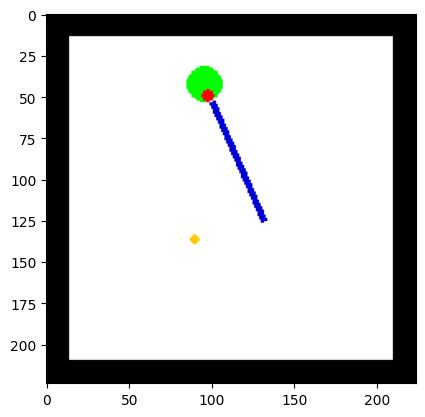

In [27]:
# Generate sample blue line direction data
# get_blue_line_direction_data returns (images, text_tensors)
sample_images, sample_texts = get_blue_line_direction_data(1)

print(f"Image shape: {sample_images.shape}")
print(f"Text shape: {sample_texts.shape}")
print(f"Decoded text: {tokenizer.decode(sample_texts[0])}")

quick_display(sample_images[0])

In [28]:
# Set inp_tensor to use the sample blue line image instead of game
inp_tensor = sample_images[:1]
print(f"inp_tensor set to blue line image, shape: {inp_tensor.shape}")

inp_tensor set to blue line image, shape: torch.Size([1, 3, 224, 224])


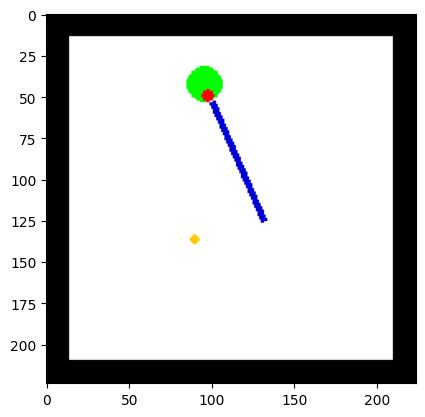

In [29]:
# Display the current inp_tensor
if inp_tensor is not None:
    quick_display(inp_tensor[0])
else:
    print("inp_tensor is None (using game image)")

In [30]:
inp_tensor = None
# back to using the game

In [32]:
# Create and display the widget interface
# This provides a clean, reusable interface for model exploration

interface = create_interface(model, device, tokenizer)
interface.display()

# You can also access the interface programmatically:
# interface.reset_game()  # Reset the game
# interface.get_image()   # Get current game image as tensor
# interface.model         # Access the model directly